<a href="https://colab.research.google.com/github/flaakira/Kaggle/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import DataFrame

In [0]:
import pandas as pd
import numpy as np

In [0]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Treat Data

In [0]:
train['Sex'].replace(['female','male'],[0,1],inplace=True)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test = pd.read_csv('test.csv')

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
test['Sex'].replace(['female','male'],[0,1],inplace=True)

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
renomear = {"Sex : Survived"}

In [0]:
sex = test['Sex']

In [0]:
PassengerId = test['PassengerId']

In [0]:
sub = pd.concat([PassengerId, sex], axis=1, join='inner')

In [0]:
renomear = {'Sex' : 'Survived'}

In [0]:
sub = sub.rename(columns = renomear)

In [16]:
sub.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0


In [0]:
sub.set_index('PassengerId', inplace=True)

In [0]:
sub.to_csv("sexmodel.csv", header=True)

In [19]:
!head -n10 sexmodel.csv

PassengerId,Survived
892,1
893,0
894,1
895,1
896,0
897,1
898,0
899,1
900,0


Machine Learning - RandomForestClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [21]:
X_falso = np.arange(10)
X_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
variaveis = ['Sex', 'Age']

In [0]:
X = train[variaveis]
Y= train['Survived']

In [24]:
X.head()

,Sex,Age
0,1,22.0
1,0,38.0
2,0,26.0
3,0,35.0
4,1,35.0


In [0]:
np.random.seed(0)
X_treino, X_valid, Y_treino, Y_valid =  train_test_split(X,Y, test_size=0.5)

In [26]:
X_treino.shape, X_valid.shape,  Y_treino.shape, Y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [0]:
X = X.fillna(-1)

In [0]:
X_prev = test[variaveis]
X_prev = X_prev.fillna(-1)

In [0]:
X_treino = X_treino.fillna(-1)
Y_treino = Y_treino.fillna(-1)

In [30]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
modelo.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
X_valid = X_valid.fillna(-1)

In [0]:
p = modelo.predict(X_valid)

In [33]:
np.mean(Y_valid == p)

0.7690582959641256

In [34]:
X_prev.head()

,Sex,Age
0,1,34.5
1,0,47.0
2,1,62.0
3,1,27.0
4,0,22.0


In [0]:
p =   modelo.predict(X_prev)

In [36]:
p

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [37]:
modelo.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Cross Validation

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [39]:
result =[]
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for line_train, line_valid in kf.split(X):
  print("Train:", line_train.shape[0])
  print("Test:", line_valid.shape[0])
  print()

  X_treino, X_valid = X.iloc[line_train], X.iloc[line_valid]
  Y_treino, Y_valid = Y.iloc[line_train], Y.iloc[line_valid]
  #print(X_treino.head)
  #print()

  modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
  modelo.fit(X_treino, Y_treino)

  p= modelo.predict(X_valid)
  acc=np.mean(Y_valid ==p)
  result.append(acc)
  print("Acc:", acc)
  print()


Train: 445
Test: 446

Acc: 0.7511210762331838

Train: 446
Test: 445

Acc: 0.7617977528089888

Train: 445
Test: 446

Acc: 0.7533632286995515

Train: 446
Test: 445

Acc: 0.7595505617977528

Train: 445
Test: 446

Acc: 0.7690582959641256

Train: 446
Test: 445

Acc: 0.7573033707865169

Train: 445
Test: 446

Acc: 0.7399103139013453

Train: 446
Test: 445

Acc: 0.7573033707865169

Train: 445
Test: 446

Acc: 0.7354260089686099

Train: 446
Test: 445

Acc: 0.797752808988764

Train: 445
Test: 446

Acc: 0.7690582959641256

Train: 446
Test: 445

Acc: 0.7640449438202247

Train: 445
Test: 446

Acc: 0.7757847533632287

Train: 446
Test: 445

Acc: 0.7573033707865169

Train: 445
Test: 446

Acc: 0.7556053811659192

Train: 446
Test: 445

Acc: 0.7640449438202247

Train: 445
Test: 446

Acc: 0.7443946188340808

Train: 446
Test: 445

Acc: 0.7595505617977528

Train: 445
Test: 446

Acc: 0.7533632286995515

Train: 446
Test: 445

Acc: 0.7640449438202247



In [40]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <a list of 10 Patch objects>)

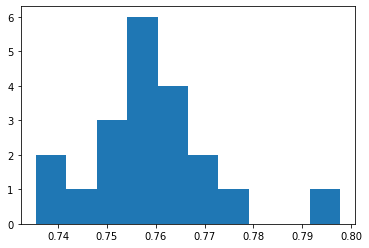

In [41]:
pylab.hist(result)

In [42]:
np.mean(result)

0.7594890915503603


# new variables

last Result: 0.7594890915503603

In [43]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
variaveis = ['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [0]:
X = train[variaveis].fillna(-1)
Y = train['Survived']

In [46]:
result =[]
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for line_train, line_valid in kf.split(X):
  print("Train:", line_train.shape[0])
  print("Test:", line_valid.shape[0])
  print()

  X_treino, X_valid = X.iloc[line_train], X.iloc[line_valid]
  Y_treino, Y_valid = Y.iloc[line_train], Y.iloc[line_valid]
  #print(X_treino.head)
  #print()

  modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
  modelo.fit(X_treino, Y_treino)

  p= modelo.predict(X_valid)
  acc=np.mean(Y_valid ==p)
  result.append(acc)
  print("Acc:", acc)
  print()


Train: 445
Test: 446

Acc: 0.7825112107623319

Train: 446
Test: 445

Acc: 0.7820224719101123

Train: 445
Test: 446

Acc: 0.8228699551569507

Train: 446
Test: 445

Acc: 0.8089887640449438

Train: 445
Test: 446

Acc: 0.8026905829596412

Train: 446
Test: 445

Acc: 0.7842696629213484

Train: 445
Test: 446

Acc: 0.8183856502242153

Train: 446
Test: 445

Acc: 0.7820224719101123

Train: 445
Test: 446

Acc: 0.8004484304932735

Train: 446
Test: 445

Acc: 0.8067415730337079

Train: 445
Test: 446

Acc: 0.820627802690583

Train: 446
Test: 445

Acc: 0.8

Train: 445
Test: 446

Acc: 0.8026905829596412

Train: 446
Test: 445

Acc: 0.8089887640449438

Train: 445
Test: 446

Acc: 0.8116591928251121

Train: 446
Test: 445

Acc: 0.7865168539325843

Train: 445
Test: 446

Acc: 0.8408071748878924

Train: 446
Test: 445

Acc: 0.802247191011236

Train: 445
Test: 446

Acc: 0.7914798206278026

Train: 446
Test: 445

Acc: 0.802247191011236



(array([5., 1., 0., 6., 3., 1., 3., 0., 0., 1.]),
 array([0.78202247, 0.78790094, 0.79377941, 0.79965788, 0.80553635,
        0.81141482, 0.81729329, 0.82317176, 0.82905023, 0.8349287 ,
        0.84080717]),
 <a list of 10 Patch objects>)

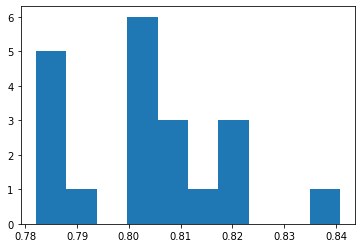

In [47]:
pylab.hist(result)

In [48]:
np.mean(result)

0.8029107673703836

#Retrain

In [49]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [0]:
train['Sex'].replace(['female','male'],[0,1],inplace=True)

In [0]:
test['Sex'].replace(['female','male'],[0,1],inplace=True)

In [0]:
X = train[variaveis].fillna(-1)
Y= train['Survived']

In [0]:
variaveis = ['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [55]:
test[variaveis].head()

,Sex,Age,Pclass,SibSp,Parch,Fare
0,1,34.5,3,0,0,7.8292
1,0,47.0,3,1,0,7.0000
2,1,62.0,2,0,0,9.6875
3,1,27.0,3,0,0,8.6625
4,0,22.0,3,1,1,12.2875


In [0]:
  modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
  modelo.fit(X,Y)

  p= modelo.predict(test[variaveis].fillna(-1))

In [57]:
p

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Error Analyze

In [58]:
result =[]
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for line_train, line_valid in kf.split(X):
  print("Train:", line_train.shape[0])
  print("Test:", line_valid.shape[0])
  print()

  X_treino, X_valid = X.iloc[line_train], X.iloc[line_valid]
  Y_treino, Y_valid = Y.iloc[line_train], Y.iloc[line_valid]
  #print(X_treino.head)
  #print()

  modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
  modelo.fit(X_treino, Y_treino)

  p= modelo.predict(X_valid)
  acc=np.mean(Y_valid ==p)
  result.append(acc)
  print("Acc:", acc)
  print()


Train: 445
Test: 446

Acc: 0.7825112107623319

Train: 446
Test: 445

Acc: 0.7820224719101123

Train: 445
Test: 446

Acc: 0.8228699551569507

Train: 446
Test: 445

Acc: 0.8089887640449438

Train: 445
Test: 446

Acc: 0.8026905829596412

Train: 446
Test: 445

Acc: 0.7842696629213484

Train: 445
Test: 446

Acc: 0.8183856502242153

Train: 446
Test: 445

Acc: 0.7820224719101123

Train: 445
Test: 446

Acc: 0.8004484304932735

Train: 446
Test: 445

Acc: 0.8067415730337079

Train: 445
Test: 446

Acc: 0.820627802690583

Train: 446
Test: 445

Acc: 0.8

Train: 445
Test: 446

Acc: 0.8026905829596412

Train: 446
Test: 445

Acc: 0.8089887640449438

Train: 445
Test: 446

Acc: 0.8116591928251121

Train: 446
Test: 445

Acc: 0.7865168539325843

Train: 445
Test: 446

Acc: 0.8408071748878924

Train: 446
Test: 445

Acc: 0.802247191011236

Train: 445
Test: 446

Acc: 0.7914798206278026

Train: 446
Test: 445

Acc: 0.802247191011236



In [59]:
X_valid_check = train.iloc[line_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,p
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0


In [60]:
X_valid_check.shape

(445, 13)

In [61]:
X_valid_check.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'p'],
      dtype='object')

In [62]:
error = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
error = error[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'p','Survived']]
error.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,p,Survived
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
21,22,2,"Beesley, Mr. Lawrence",1,34.0,0,0,248698,13.0000,D56,S,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",0,15.0,0,0,330923,8.0292,NaN,Q,0,1
23,24,1,"Sloper, Mr. William Thompson",1,28.0,0,0,113788,35.5000,A6,S,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",0,38.0,1,5,347077,31.3875,NaN,S,0,1


In [0]:
female = error[error['Sex'] == 0]
male = error[error['Sex'] == 1]

In [64]:
female.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,p,Survived
474,475,3,"Strandberg, Miss. Ida Sofia",0,22.0,0,0,7553,9.8375,NaN,S,1,0
854,855,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",0,44.0,1,0,244252,26.0000,NaN,S,1,0
852,853,3,"Boulos, Miss. Nourelain",0,9.0,1,1,2678,15.2458,NaN,C,1,0
772,773,2,"Mack, Mrs. (Mary)",0,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,1,0
654,655,3,"Hegarty, Miss. Hanora ""Nora""",0,18.0,0,0,365226,6.7500,NaN,Q,1,0
593,594,3,"Bourke, Miss. Mary",0,NaN,0,2,364848,7.7500,NaN,Q,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",0,37.0,0,0,4135,9.5875,NaN,S,1,0
502,503,3,"O'Sullivan, Miss. Bridget Mary",0,NaN,0,0,330909,7.6292,NaN,Q,1,0
501,502,3,"Canavan, Miss. Mary",0,21.0,0,0,364846,7.7500,NaN,Q,1,0
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0,1,2,113781,151.5500,C22 C26,S,1,0


In [65]:
male.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,p,Survived
238,239,2,"Pengelly, Mr. Frederick William",1,19.00,0,0,28665,10.5000,NaN,S,1,0
371,372,3,"Wiklund, Mr. Jakob Alfred",1,18.00,1,0,3101267,6.4958,NaN,S,1,0
295,296,1,"Lewy, Mr. Ervin G",1,NaN,0,0,PC 17612,27.7208,NaN,C,1,0
698,699,1,"Thayer, Mr. John Borland",1,49.00,1,1,17421,110.8833,C68,C,1,0
422,423,3,"Zimmerman, Mr. Leo",1,29.00,0,0,315082,7.8750,NaN,S,1,0
262,263,1,"Taussig, Mr. Emil",1,52.00,1,1,110413,79.6500,E67,S,1,0
721,722,3,"Jensen, Mr. Svend Lauritz",1,17.00,1,0,350048,7.0542,NaN,S,1,0
544,545,1,"Douglas, Mr. Walter Donald",1,50.00,1,0,PC 17761,106.4250,C86,C,1,0
231,232,3,"Larsson, Mr. Bengt Edvin",1,29.00,0,0,347067,7.7750,NaN,S,1,0
214,215,3,"Kiernan, Mr. Philip",1,NaN,1,0,367229,7.7500,NaN,Q,1,0


# New test - Check Names

In [0]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabin_null'] = train['Cabin'].isnull().astype(int)

train['Name_is_miss'] = train['Name'].str.contains("Miss").astype(int)
train['Name_is_mrs'] = train['Name'].str.contains("Mrs").astype(int)


train['Name_is_master'] = train['Name'].str.contains("Master").astype(int)
train['Name_is_col'] = train['Name'].str.contains("Col").astype(int)
train['Name_is_major'] = train['Name'].str.contains("Major").astype(int)
train['Name_is_mr'] = train['Name'].str.contains("Mr").astype(int)

In [67]:
variaveis

['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [0]:
variaveis = ['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare','Embarked_S', 'Embarked_C', 
             'Embarked_Q', 'Cabin_null', 'Name_is_miss', 'Name_is_mrs', 'Name_is_master',
             'Name_is_col', 'Name_is_major', 'Name_is_mr']

X = train[variaveis].fillna(-1)
Y= train['Survived']

In [74]:
result2 =[]
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for line_train, line_valid in kf.split(X):
  print("Train:", line_train.shape[0])
  print("Test:", line_valid.shape[0])

  X_treino, X_valid = X.iloc[line_train], X.iloc[line_valid]
  Y_treino, Y_valid = Y.iloc[line_train], Y.iloc[line_valid]

  modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
  modelo.fit(X_treino, Y_treino)

  p= modelo.predict(X_valid)

  acc=np.mean(Y_valid ==p)
  result2.append(acc)
  print("Acc:", acc)
  print()

Train: 445
Test: 446
Acc: 0.7645739910313901

Train: 446
Test: 445
Acc: 0.7842696629213484

Train: 445
Test: 446
Acc: 0.8228699551569507

Train: 446
Test: 445
Acc: 0.7932584269662921

Train: 445
Test: 446
Acc: 0.8139013452914798

Train: 446
Test: 445
Acc: 0.8

Train: 445
Test: 446
Acc: 0.8183856502242153

Train: 446
Test: 445
Acc: 0.7910112359550562

Train: 445
Test: 446
Acc: 0.8161434977578476

Train: 446
Test: 445
Acc: 0.8067415730337079

Train: 445
Test: 446
Acc: 0.7869955156950673

Train: 446
Test: 445
Acc: 0.7887640449438202

Train: 445
Test: 446
Acc: 0.8363228699551569

Train: 446
Test: 445
Acc: 0.8067415730337079

Train: 445
Test: 446
Acc: 0.773542600896861

Train: 446
Test: 445
Acc: 0.8112359550561797

Train: 445
Test: 446
Acc: 0.8497757847533632

Train: 446
Test: 445
Acc: 0.8089887640449438

Train: 445
Test: 446
Acc: 0.8071748878923767

Train: 446
Test: 445
Acc: 0.8112359550561797



((array([1., 1., 3., 2., 3., 5., 3., 0., 1., 1.]),
  array([0.76457399, 0.77309417, 0.78161435, 0.79013453, 0.79865471,
         0.80717489, 0.81569507, 0.82421525, 0.83273543, 0.84125561,
         0.84977578]),
  <a list of 10 Patch objects>),
 (array([ 1.,  1.,  8.,  3., 10.,  8.,  6.,  0.,  2.,  1.]),
  array([0.76457399, 0.77309417, 0.78161435, 0.79013453, 0.79865471,
         0.80717489, 0.81569507, 0.82421525, 0.83273543, 0.84125561,
         0.84977578]),
  <a list of 10 Patch objects>))

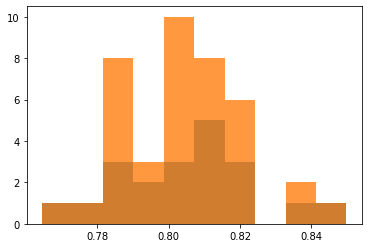

In [85]:
pylab.hist(result2), pylab.hist(result, alpha=0.8)

In [76]:
np.mean(result2)

0.8045966644832971

In [0]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabin_null'] = test['Cabin'].isnull().astype(int)

test['Name_is_miss'] = test['Name'].str.contains("Miss").astype(int)
test['Name_is_mrs'] = test['Name'].str.contains("Mrs").astype(int)


test['Name_is_master'] = test['Name'].str.contains("Master").astype(int)
test['Name_is_col'] = test['Name'].str.contains("Col").astype(int)
test['Name_is_major'] = test['Name'].str.contains("Major").astype(int)
test['Name_is_mr'] = test['Name'].str.contains("Mr").astype(int)

modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
modelo.fit(X,Y)

p= modelo.predict(test[variaveis].fillna(-1))

# Submission

In [87]:
sub = pd.Series(p, index=test['PassengerId'], name = 'Survived')
sub.shape

(418,)

In [0]:
sub.to_csv("titanic_machinelearn.csv")

In [89]:
!head -n10 titanic_machinelearn.csv

PassengerId,Survived
892,0
893,0
894,0
895,1
896,1
897,0
898,0
899,0
900,1
